In [1]:
## todo
# README.md
# optimizer : learning rate scheduler
# layer : rnn, batch normalization
# analysis : validation error
# fit : callbacks

# tf -> custom calcuration program

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

import k.Activations.functions as Activations
import k.Layers.functions as Layers
import k.Losses.functions as Losses
import k.Optimizers.functions as Optimizers

In [3]:
class Neural_network:
    def __init__(self):
        self.network = []

    def to_object(self, param, class_):
        if type(param) == str:
            return class_(param)
        return param

    def compile(self, loss, optimizer):
        self.loss = self.to_object(loss, Losses.function)
        self.optimizer = self.to_object(optimizer, Optimizers.function)

        for layer in self.network:
            if not hasattr(layer, 'set_shape'):
                continue

            if layer.input_shape is None:
                layer.input_shape = output_shape

            layer.set_shape()
            output_shape = layer.output_shape

            if hasattr(layer, 'set_vars'):
                layer.set_vars(copy.deepcopy(self.optimizer))

        self.network_depth = len(self.network)

    def predict(self, data):
        self.calcuration_graph = [data]

        for layer in self.network:
            data = layer.forward(data)
            self.calcuration_graph.append(data)

        return data

    def evaluate(self, x, y):
        loss = self.loss.forward(y, self.predict(x))
        return loss

    def fit(self, x, y, batch_size, epochs, verbose):
        loss_graph = []

        data_num = x.shape[0]

        if batch_size > data_num:
            batch_size = data_num

        mini_batch_num = data_num//batch_size
        epoch_digits = len(str(epochs))

        for epoch in range(epochs):
            for batch in range(mini_batch_num):
                index = np.random.randint(data_num, size=batch_size)
                batch_x = x[index, :]
                batch_y = y[index, :]

                batch_p = self.predict(batch_x)

                loss = self.loss.forward(batch_y, batch_p)
                gradients = self.loss.backward(batch_y, batch_p)
                for i in range(self.network_depth):
                    gradients = self.network[-i-1].backward(gradients, self.calcuration_graph[-i-2], self.calcuration_graph[-i-1])

                if verbose == 2:
                    print(f"epoch: {epoch:0{epoch_digits}d}, batch: {batch}/{mini_batch_num} | loss: ", f'{loss:.4f}' if loss <= 0.0001 else f'{loss:.4e}')

            if verbose == 1:
                print(f"epoch: {epoch:0{epoch_digits}d} | loss: ", f'{loss:.4f}' if loss > 0.0001 else f'{loss:.4e}')

            loss_graph.append(loss)

        return np.array(loss_graph)

In [4]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
train_x, train_y = train_data
test_x, test_y = test_data

data = [train_x/255, train_y, test_x/255, test_y]
processed_data = [np.array(tf.expand_dims(d, -1), dtype=np.float32)[0:40000] for d in data]

train_x, train_y, test_x, test_y = processed_data

2024-03-10 22:00:40.811521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 22:00:40.812676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [6]:
model = Neural_network()
model.network.append(Layers.Convolution2D(input_shape=train_x.shape[1::], filters=2, kernel_shape=(3, 3)))
model.network.append(Activations.ReLU())
model.network.append(Layers.Flatten())
model.network.append(Layers.Dense(output_shape=32, dropout_rate=0.1))
model.network.append(Activations.ReLU())
model.network.append(Layers.Dense(output_shape=10))
model.network.append(Activations.Softmax())

optimizer = Optimizers.Adam(learning_rate=1e-4)
model.compile('cce', optimizer)

In [7]:
model.evaluate(test_x, test_y)

<tf.Tensor: shape=(), dtype=float32, numpy=0.2347741>

In [8]:
hist = model.fit(train_x, train_y, batch_size=4096, epochs=100, verbose=1)

epoch: 000 | loss:  0.2236
epoch: 001 | loss:  0.2131
epoch: 002 | loss:  0.2020
epoch: 003 | loss:  0.1910
epoch: 004 | loss:  0.1796
epoch: 005 | loss:  0.1683
epoch: 006 | loss:  0.1595
epoch: 007 | loss:  0.1481
epoch: 008 | loss:  0.1383
epoch: 009 | loss:  0.1286
epoch: 010 | loss:  0.1213
epoch: 011 | loss:  0.1124
epoch: 012 | loss:  0.1060
epoch: 013 | loss:  0.1001
epoch: 014 | loss:  0.0940
epoch: 015 | loss:  0.0904
epoch: 016 | loss:  0.0840
epoch: 017 | loss:  0.0809
epoch: 018 | loss:  0.0777
epoch: 019 | loss:  0.0754
epoch: 020 | loss:  0.0714
epoch: 021 | loss:  0.0684
epoch: 022 | loss:  0.0649
epoch: 023 | loss:  0.0648
epoch: 024 | loss:  0.0623
epoch: 025 | loss:  0.0594
epoch: 026 | loss:  0.0571
epoch: 027 | loss:  0.0559
epoch: 028 | loss:  0.0557
epoch: 029 | loss:  0.0522
epoch: 030 | loss:  0.0526
epoch: 031 | loss:  0.0514
epoch: 032 | loss:  0.0493
epoch: 033 | loss:  0.0485
epoch: 034 | loss:  0.0455
epoch: 035 | loss:  0.0456
epoch: 036 | loss:  0.0469
e

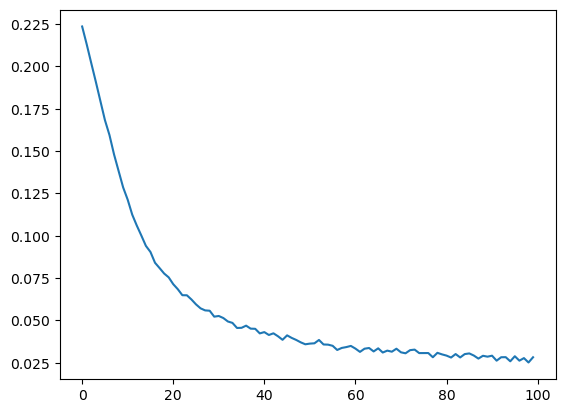

In [9]:
plt.plot(hist)
plt.show()

In [10]:
model.evaluate(test_x, test_y)

<tf.Tensor: shape=(), dtype=float32, numpy=0.026333047>

make tensorflow model to compare

In [12]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.Conv2D(filters=2, kernel_size=3, input_shape=train_x.shape[1::], activation='relu'))
tf_model.add(tf.keras.layers.Flatten())
tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dropout(0.1))
tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
tf_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [13]:
tf_model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 6ms/step - loss: 2.3523


2.3522651195526123

In [14]:
tf_hist = tf_model.fit(train_x, train_y, epochs=100, batch_size=4096, verbose=1)

Epoch 1/100


10/10 [==============================] - 1s 65ms/step - loss: 2.3228
Epoch 2/100
10/10 [==============================] - 1s 89ms/step - loss: 2.2470
Epoch 3/100
10/10 [==============================] - 1s 70ms/step - loss: 2.1745
Epoch 4/100
10/10 [==============================] - 1s 73ms/step - loss: 2.0998
Epoch 5/100
10/10 [==============================] - 1s 71ms/step - loss: 2.0219
Epoch 6/100
10/10 [==============================] - 1s 62ms/step - loss: 1.9443
Epoch 7/100
10/10 [==============================] - 1s 61ms/step - loss: 1.8687
Epoch 8/100
10/10 [==============================] - 1s 72ms/step - loss: 1.7956
Epoch 9/100
10/10 [==============================] - 1s 75ms/step - loss: 1.7252
Epoch 10/100
10/10 [==============================] - 1s 72ms/step - loss: 1.6541
Epoch 11/100
10/10 [==============================] - 1s 70ms/step - loss: 1.5863
Epoch 12/100
10/10 [==============================] - 1s 72ms/step - loss: 1.5239
Epoch 13/100
10/10 [=================

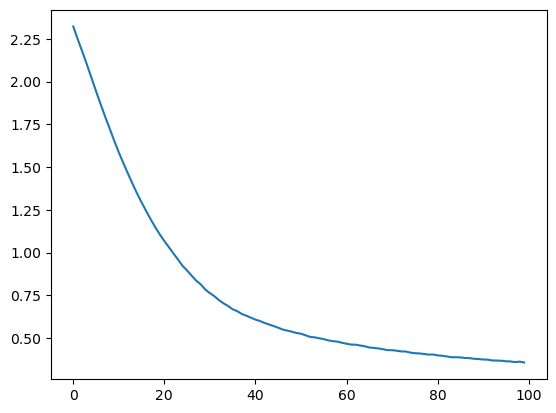

In [15]:
plt.plot(tf_hist.history['loss'])
plt.show()

In [16]:
tf_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2963


0.2963334918022156